In [2]:
#Cargaremos algunas librerías que nos serán útiles para analizar el dataset

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px

In [73]:
#Cargaremos el dataset
df = pd.read_csv("C:/Users/kurtc/Documents/GitHub/Proyecto-Final/Data/Student_performance_data.csv", index_col="StudentID")

#### 1. Crearemos un gráfico de countplots, para ver la distribución de las variables categóricas del dateset por sexo.

In [74]:
# Se creará la variable numerical_columns y que tengan más de 5 valores únicos, ya que al ser menos, se pueden considerar variables categóricas
numerical_columns = [col for col in df.columns if df[col].nunique() > 5]

# Se creará la variable categorical_columns que identificará columnas que no son numéricas y que no son "GradeClass"
categorical_columns = df.columns.difference(numerical_columns).difference(['GradeClass']).to_list()

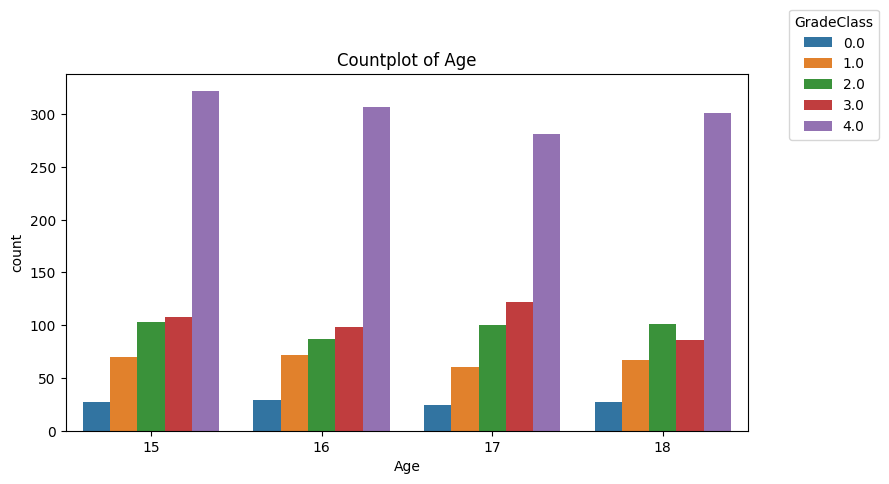

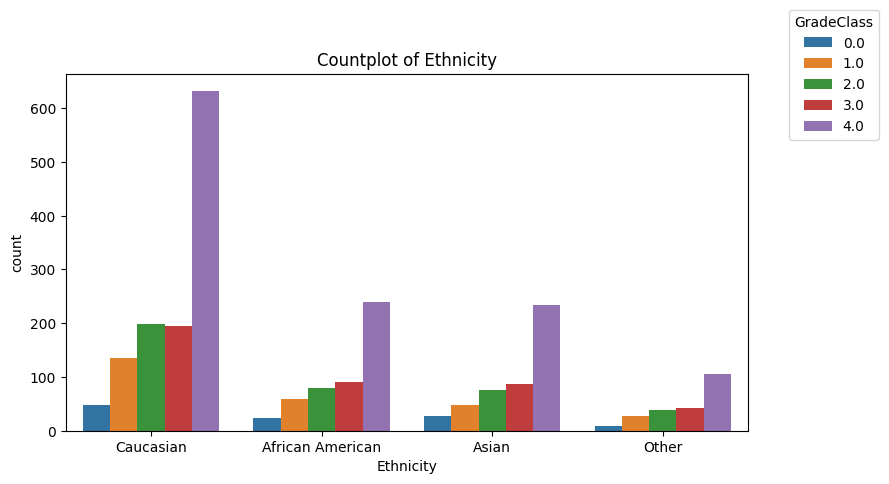

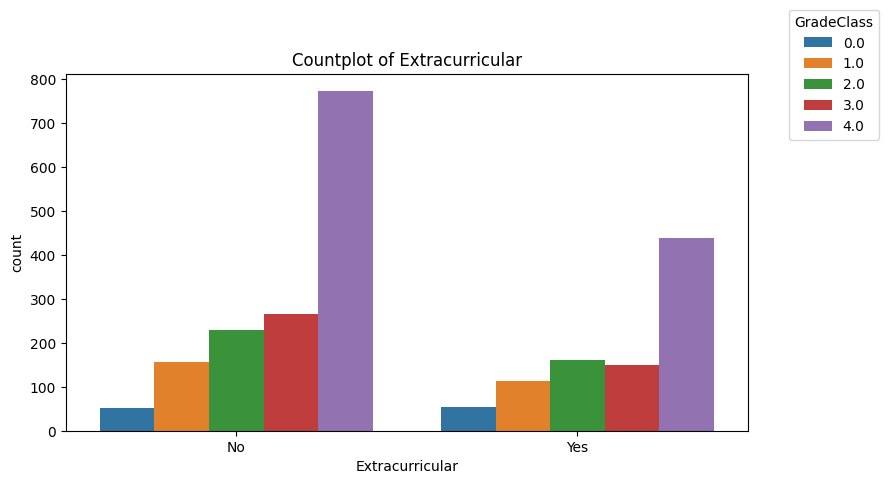

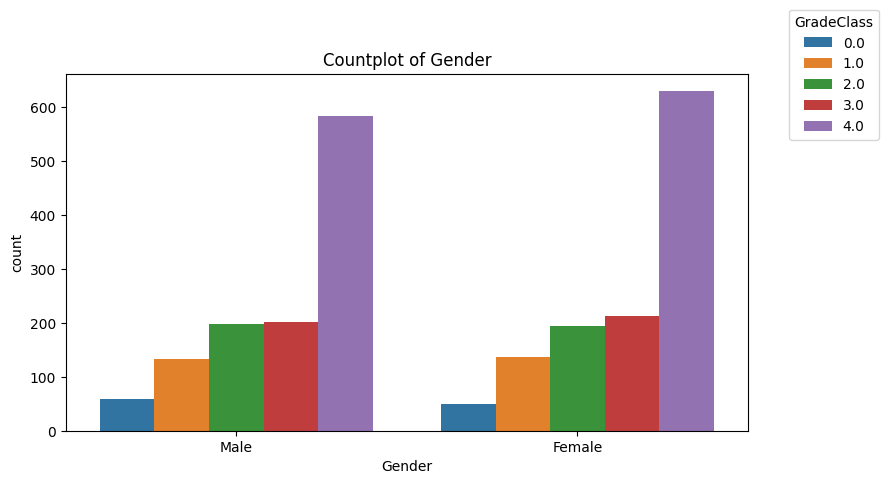

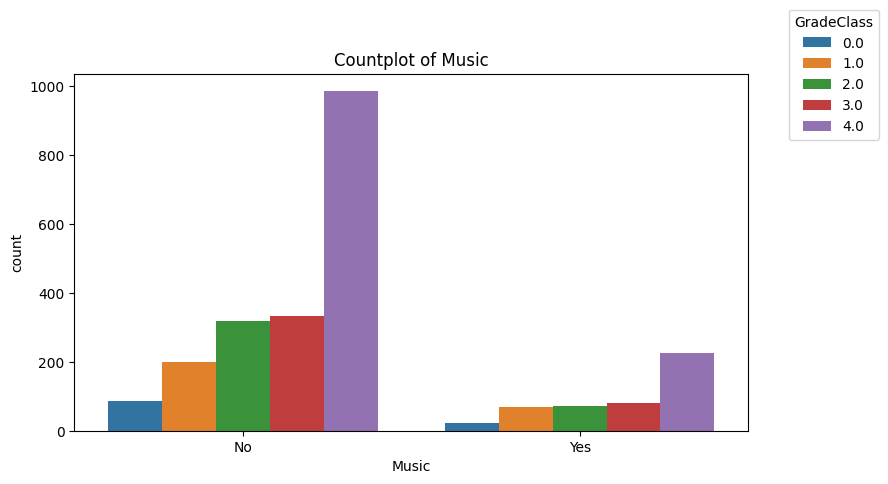

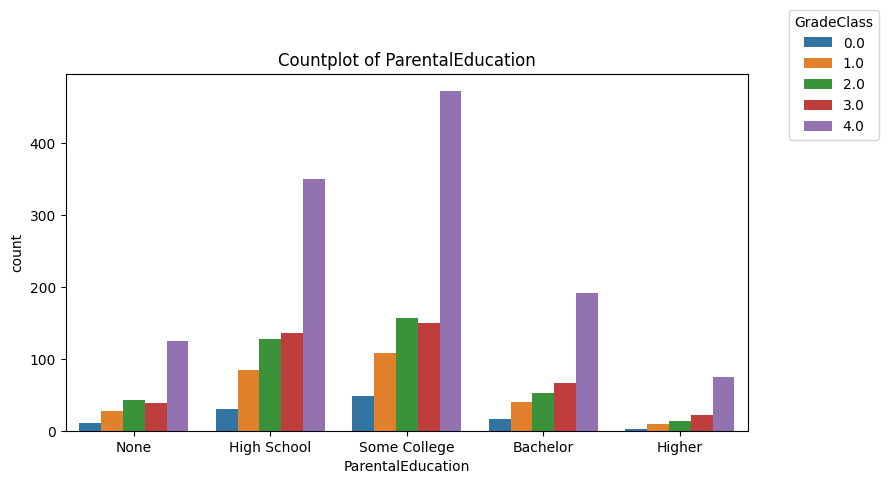

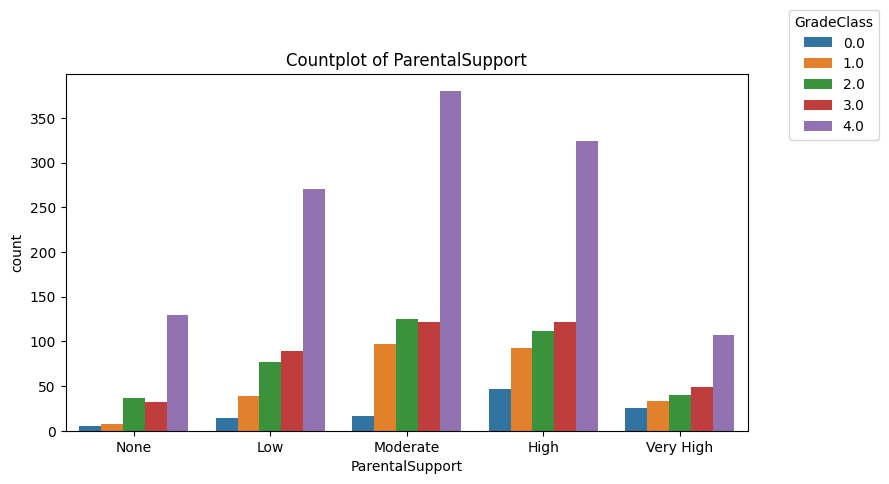

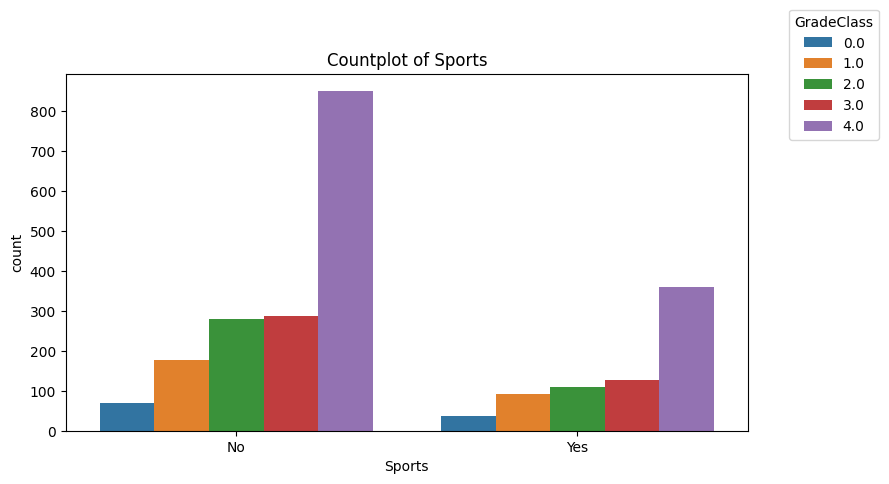

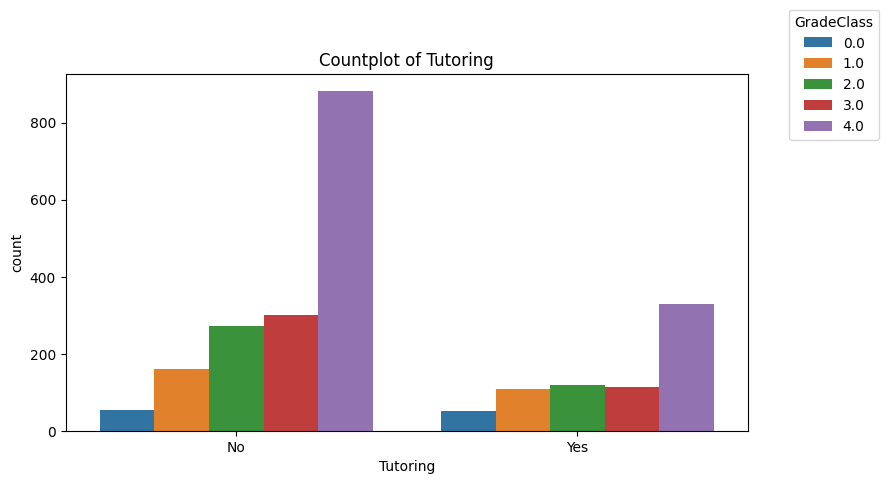

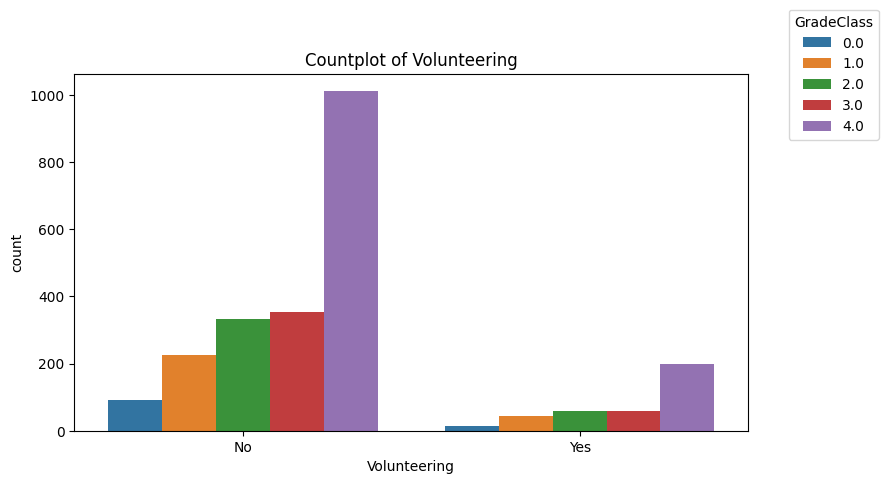

In [96]:
# Haremos etiquetas en un diccinario, para dar más claridad a las gráficas que generaremos
custom_labels = {
    'Age' : [15, 16, 17, 18],
    'Gender' : ['Male', 'Female'],
    'Ethnicity' : ['Caucasian', 'African American', 'Asian', 'Other'],
    'ParentalEducation' : ['None', 'High School', 'Some College', 'Bachelor', 'Higher'],
    'Tutoring' : ['No', 'Yes'],
    'ParentalSupport' : ['None', 'Low', 'Moderate', 'High', 'Very High'],
    'Extracurricular' : ['No', 'Yes'],
    'Sports' : ['No', 'Yes'],
    'Music' : ['No', 'Yes'],
    'Volunteering' : ['No', 'Yes']
}

for column in categorical_columns:
    plt.figure(figsize=(9, 5))
    sns.countplot(data=df, x=column, hue='GradeClass', palette='tab10')
    plt.title(f'Countplot of {column}')
    plt.legend(bbox_to_anchor=(1.05, 1.2), loc='upper left', title= 'GradeClass')
    
    # Directly set custom labels
    labels = custom_labels[column]
    ticks = range(len(labels))
    plt.xticks(ticks=ticks, labels=labels)
    
    plt.tight_layout()
    plt.show()

#### Conclusión de los countplots

Podemos ver que gran parte de los estudiantes dentro de las distintas categorías, se distribuyen mayormente en el grupo de estudiantes que pertenecen al GradeClass 4, que son los alumnos clasificados con los promedios más bajos.

Ahora haremos unos boxplots, para ver como se distribuyen en el dataset las variables numéricas

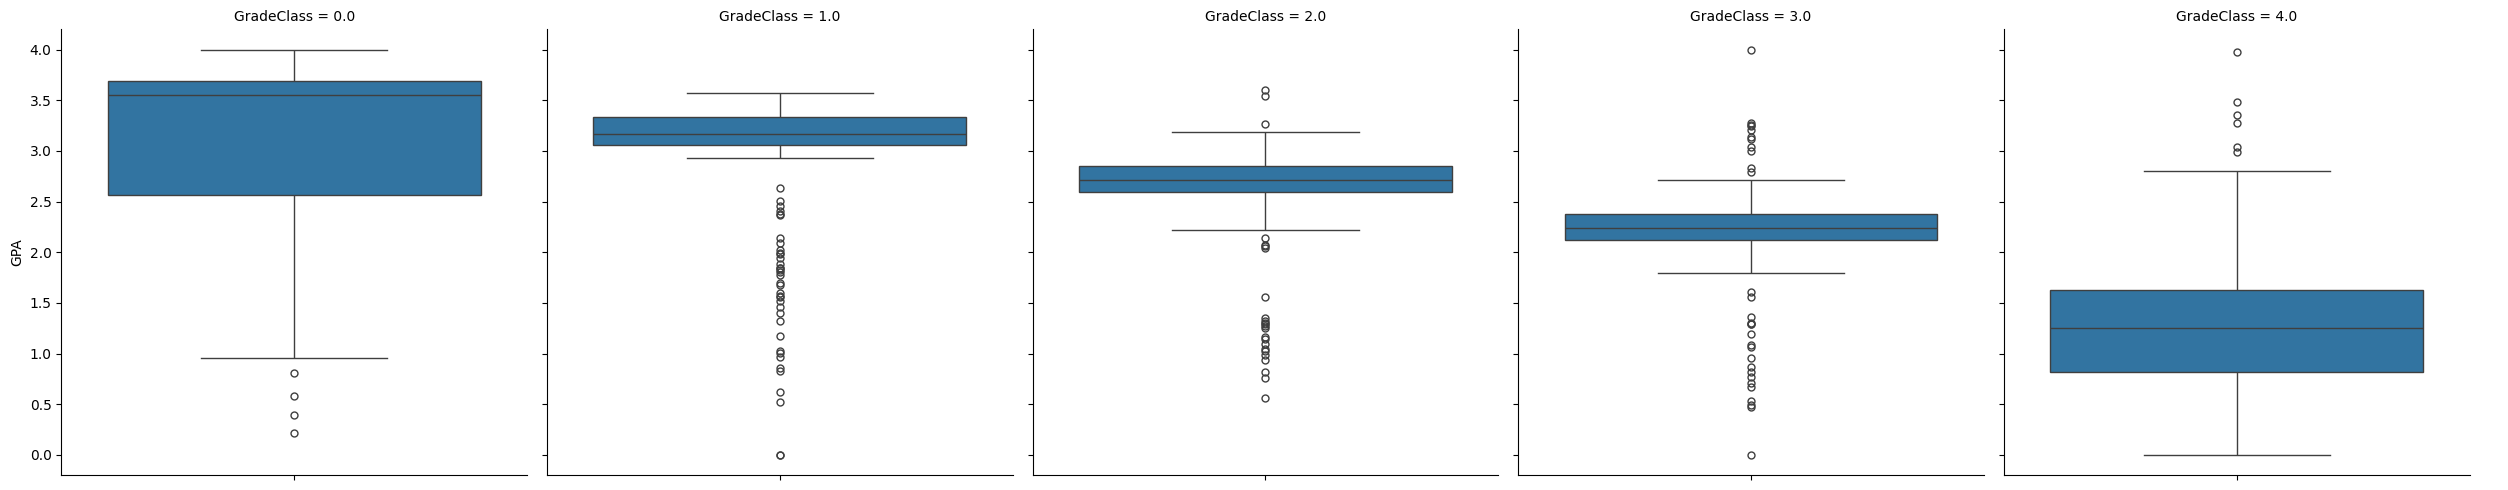

In [83]:
sns.catplot(y='GPA', data=df, kind='box', col='GradeClass')
plt.show()

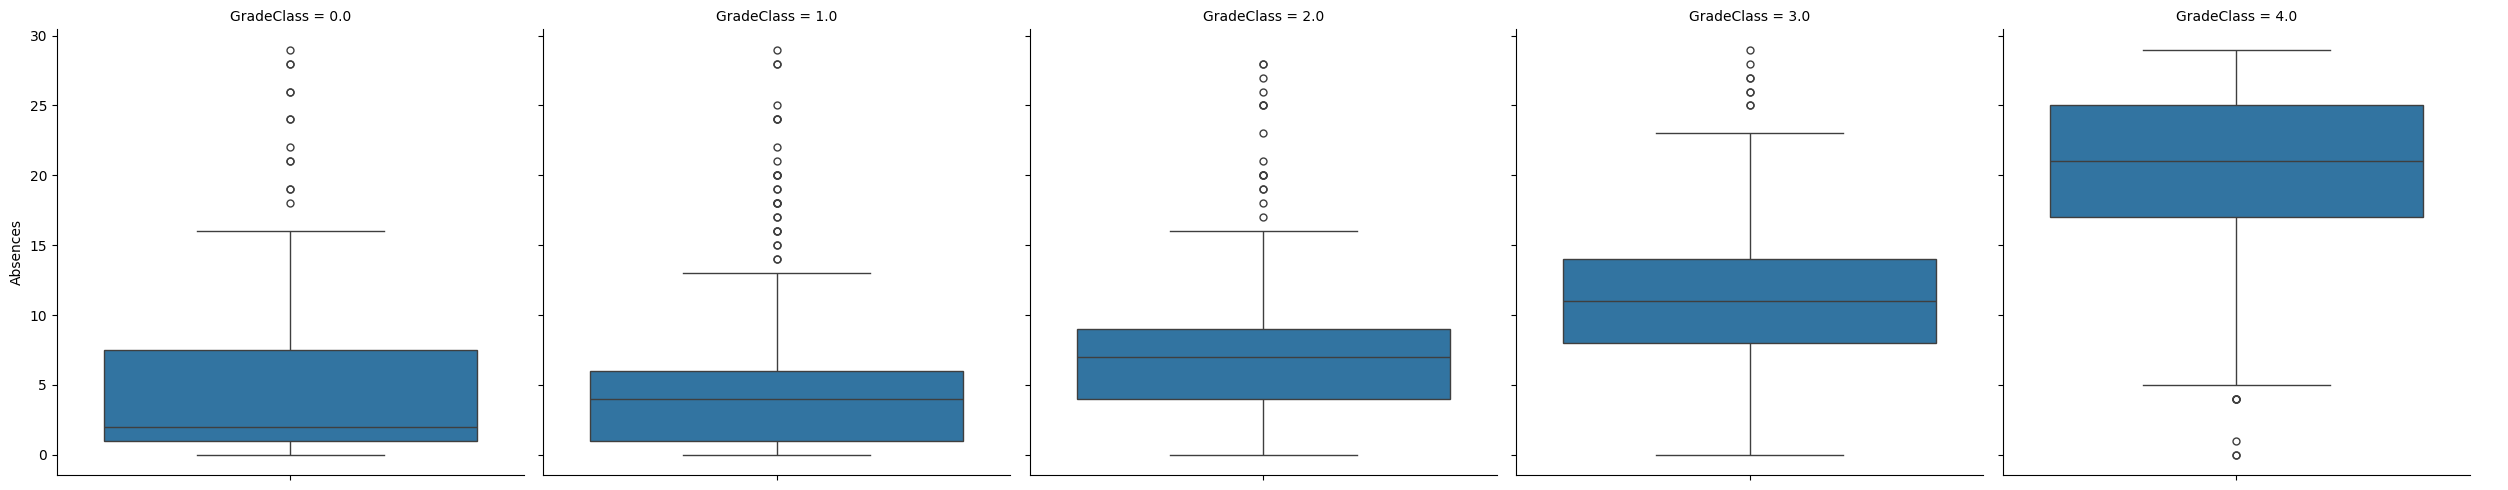

In [67]:
sns.catplot(y='Absences', data=df, kind='box', col='GradeClass')
plt.show()

#### 2. A continuación queremos analizar diferentes variables del dataset para dar respuesta a la siguiente pregunta:

- **¿Influye la inasistencia de los alumnos en su rendimiento escolar?**
- **¿Que tan significativo es el apoyo parental en el desempeño escolar de sus hijos?**

A continuación haremos un scatterplot, para ver las relaciones más significativas que pudimos encontrar cen el análisis exploratorio con nuestro heatmap

In [51]:
# Crearemos un scatterplot para ver la relación entre las variables Absences y GPA
fig = px.scatter(df, x='Absences', y='GPA', 
                 title='Absences vs GPA', 
                 labels={'Absences': 'Absences', 'GPA': 'GPA'},
                 color='ParentalSupport',
                 color_discrete_sequence='palette')
fig.show()

- El gráfico muestra la relación entre las asuencias y el GPA de los estudiantes y el color, es la escala del nivel de apoyo parental que reciben.

- Se puede observar una clara tendencia a la baja de las calificaciones a mayor número de ausencias.

- Aunque se puede apreciar el apoyo parental dentro del gráfico, los colores se distribuyen de manera similar dentr de cada columna, por lo que si bien el apoyo paternal puede ser un elemento importante en general, dentro del dataset no se ve una relación significativa en la relación entre ausencias y GPA.

In [38]:
# Crearemos un scatterplot para ver la relación entre las variables Absences y GradeClass
fig = px.scatter(df, x='Absences', y='GradeClass', 
                 title='Absences vs GradeClass', 
                 labels={'Absences': 'Absences', 'GradeClass': 'GradeClass'},
                 color='ParentalSupport',
                 color_discrete_sequence='palette'
                 )
fig.show()

- Aquí no se observa una clara relación entre el número de ausencias y el GradeClass. Los puntos de cada nivel de GradeClass se distribuyen de forma similar a lo largo del eje de las ausencias. Esto sugiere que las ausencias no parecen influir en el grado escolar de los estudiantes en este conjunto de datos, así como tampoco el apoyo parental.



In [27]:
# Crearemos un scatterplot para ver la relación entre las variables GradeClass y GPA
fig = px.scatter(df, x='GradeClass', y='GPA', 
                 title='GradeClass vs GPA', 
                 labels={'GradeClass': 'GradeClass', 'GPA': 'GPA'},
                 color='ParentalSupport',
                 color_discrete_sequence='palette')
fig.show()

- No parece haber una relación clara entre estas dos variables.

- Ya que no encontramos mayor relación en 2/3 de las gráficas mostradas en base a la matriz de correlación en el Análisis Exploratorio de Datos, probaremos con más variables.


In [39]:
# Crearemos un scatterplot para ver la reclación entre las variables StudyTimeWeekly y GPA
fig = px.scatter(df, x='StudyTimeWeekly', y='GPA', 
                 title='StudyTimeWeekly vs GPA', 
                 labels={'StudyTimeWeekly': 'StudyTimeWeekly', 'GPA': 'GPA'},
                 color='ParentalSupport',
                 color_discrete_sequence='palette')
fig.show()

- No existe una correlación clara entre el tiempo de estudio semanal y el GPA. Hay estudiantes que estudian mucho y tienen un GPA bajo, y otros que estudian poco y tienen un GPA alto.
- No parece haber una diferencia significativa en el GPA entre los estudiantes con diferentes niveles de apoyo parental.

EL gráfico nos muestra que el tiempo de estudio semanal así como el apoyo parental, no son los únicos factores determinantes que influyen en el GPA de un estudiante.

In [48]:
# Crearemos un scatterplot para ver la relación entre las variables Extracurricular y StudyTimeWeekly
fig = px.scatter(df, x='StudyTimeWeekly', y='Extracurricular', 
                 title='StudyTimeWeekly vs Extracurricular', 
                 labels={'StudyTimeWeekly': 'StudyTimeWeekly', 'Extracurricular': 'Extracurricular'},
                 color='ParentalSupport',
                 color_discrete_sequence='palette')
fig.show()

- Se puede observar que a lo largo del tiempo de estudio semanal se distribuyen de manera similar los estudiantes que tienen o no actividades extracurriculares. Esto sugiere que no hay una relación clara entre las dos variables. Al mismo tiempo, se distribuye de similar forma el apoyo parental dentro de la gráfica, lo que nos indica que tampoco existe una relación clara entra estas variables.

In [50]:
# Crearemos un scatterplot para ver la relación entre las variables Extracurricular y StudyTimeWeekly
fig = px.scatter(df, x='ParentalSupport', y='GPA', 
                 title='ParentalSupport vs GPA', 
                 labels={'ParentalSupport': 'ParentalSupport', 'GPA': 'GPA'},
                 color='GradeClass',
                 color_discrete_sequence='palette')
fig.show()

- Esta gráfica, muestra la relación entre el apoyo parental y el GPA, utilizando como color el GradeClass.

- Esta gráfica así como anteriores, nos muestra que no hay una relación  directa entre el apoyo parental y el GPA, y que el GradeClass no parece estar influenciado por el apoyo paternal.



#### Conclusión

A modo de conclusión, podemos ver que efectivamente con los datos del dataset, que a mayor número de ausecias de los estudiantes, influyen de manera negativa en su desempeño, teniendo estos notas más bajas que los que tienen menos inasistencias.

A su vez, comparamos y añadimos la variable "ParentalSupport" a diferentes gráficas, para conocer si existía una relación clara o influencia del apoyo parental al rendimiento de los estudiantes. Para mi sorpresa, con la información del dataset, no fue posible obtener con claridad una relación, ya que asumimos que el apoyo parental puede tener una influencia positiva, pero esto, nos ayuda a entender que si bien, es sabido que si puede influenciar un mejor rendimiento, existen otros factores y variables que determinan este mejor rendimiento de los estudiantes.